# RL Circuit
Practical Electronics pg 142

## RL Energising Schematic
$V_R$ = Voltage over the resistor

$V_L$ = Voltage over the inductor

$I$ = Current through both.

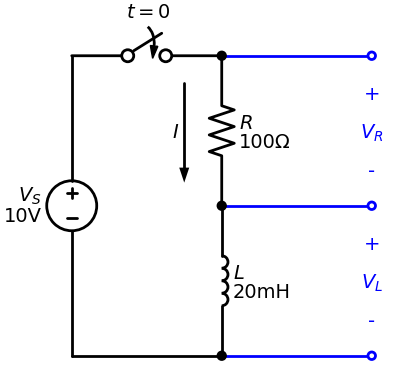

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    mc = 'blue'
    s = elm.Switch(action='close').label('$t=0$').dot()
    d.push()
    elm.Line().dot(open=True).color(mc)
    elm.Gap().down().label(['+','$V_R$','-']).dot(open=True).color(mc)
    elm.Gap().label(['+','$V_L$','-']).dot(open=True).color(mc)
    elm.Line().left().color(mc)
    d.pop()
    r = elm.Resistor().down().label('$R$\n100Ω', loc='bot').dot()
    elm.CurrentLabel(top=False, ofst=0.5).at(r).label('$I$')
    d.push()
    elm.Line().right().color(mc)
    d.pop()
    elm.Inductor().label('$L$\n20mH', loc='bottom').dot()
    elm.Line().tox(s.start)
    #elm.Ground()
    elm.SourceV().toy(s.start).label('$V_S$\n10V')

## Energising an RL circuit.
Voltage and Current flow over Time for DC voltage.

$ I = V_{S}/R(1-e^{-t/L/R}) $

$ V_{R} = IR = V_{S}(1-e^{-t/L/R}) $

$ V_{L} = L\frac{dI}{dt} = V_{S}e^{-t/L/R} $

$ \tau = \frac{L}{R} $ time constant

Notice at ${t} \geq 5 \tau$ (or ${t} \geq 5\frac{L}{R}$):
* $\frac{dI}{dt} \approx 0$ A/s - Current is not changing.
* ${V_L} \approx 0$ V - Inductor has reached zero impedance.
* ${I} \approx \frac{V_S}{R}$ - Current has reach it's maximum.

Notice:
* At ${t} = 0$, $V_L$ instantly goes to $V_S$. Assuming ideal components.
* Time period $5\tau$ (or $5\frac{L}{R}$) is relatively short. E.g. milli-seconds compared to RC circut (where $\tau = {RC}$)
* Current is relatively high compared to RC circuit because a small R is needed to increase $\tau$.
* Increasing R shortens $\tau$ and drops/limits the current.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def rl_plot(Vs=10, R_ohms=100, L_mH=20, Duration_ms=1):
    L = L_mH/1000 # mH -> H
    R = R_ohms
    time_ms = np.linspace(start=0, stop=Duration_ms, num=100)
    t = time_ms/1000 # ms -> secs
    if (R==0):
        R=1
    tc = L/R
    Vr = Vs * (1 - np.exp(-t / tc))
    Vl = Vs * np.exp(-t / tc)
    I = Vr/R*1000 # A -> mA

    fig, vp = plt.subplots(figsize=(8, 6))
    vp.set_xlabel('Time (ms)')
    vp.set_ylabel('Voltage (V)')
    vp.set_ylim((0,Vs))
    vp.plot(time_ms, Vr, label='$V_R$')
    vp.plot(time_ms, Vl, label='$V_L$')
    vp.grid(True)
    vp.legend(loc='upper left')
    vp.set_title("Energising an RL Circuit\n5$\\tau$ = 5($L/R$) = {tc:.1f}ms".format(tc=tc*5*1000))

    ip = vp.twinx()
    color = 'tab:green'
    ip.set_ylabel('Current (mA)', color=color)
    ip.set_ylim((0,200))
    ip.plot(time_ms, I, label='$I$', color=color)
    ip.tick_params(axis='y', labelcolor=color)
    ip.legend(loc='lower right')
    plt.show()

interact(rl_plot, Vs=(1, 20, 1.0), R_ohms=(50, 500, 50), L_mH=(10, 1000, 10), Duration_ms=(1, 60, 1))

interactive(children=(FloatSlider(value=10.0, description='Vs', max=20.0, min=1.0, step=1.0), IntSlider(value=…

<function __main__.rl_plot(Vs=10, R_ohms=100, L_mH=20, Duration_ms=1)>